In [13]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
(train_input,train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0 # < data가 0~255 라서 255, 1~256일땐 256
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [5]:
# Model 함수 구현
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [7]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 훈련 및 과정에 대한 history 보기
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=1) # verbose1값이 default

Epoch 1/5
   1/1500 [..............................] - ETA: 4:07 - loss: 2.4021 - accuracy: 0.0625

2023-02-28 17:23:02.190797: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 1s 657us/step - loss: 0.5349 - accuracy: 0.8127
Epoch 2/5
1500/1500 [==============================] - 1s 665us/step - loss: 0.3957 - accuracy: 0.8586
Epoch 3/5
1500/1500 [==============================] - 1s 615us/step - loss: 0.3567 - accuracy: 0.8715
Epoch 4/5
1500/1500 [==============================] - 1s 603us/step - loss: 0.3340 - accuracy: 0.8800
Epoch 5/5
1500/1500 [==============================] - 1s 639us/step - loss: 0.3181 - accuracy: 0.8864


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

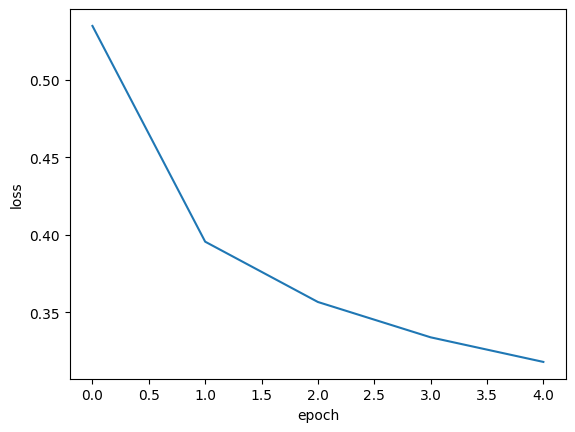

In [20]:
# history loss 의 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

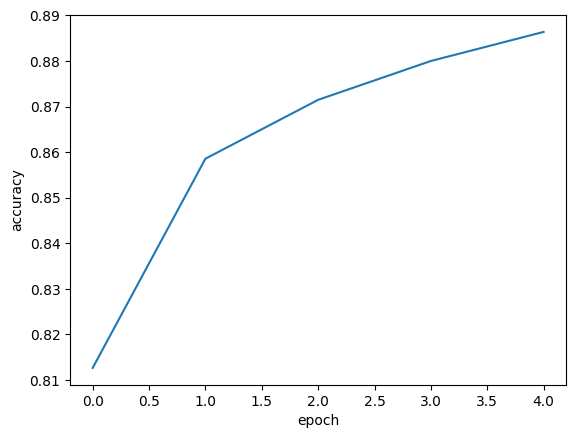

In [24]:
# history accuracy 의 시각화
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

epoch 을 더 하면 더 좋아질거 같은데? 

In [25]:
# 훈련 및 과정에 대한 history 보기
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=50, verbose=1) # verbose1값이 default

Epoch 1/50
1500/1500 [==============================] - 1s 628us/step - loss: 0.3068 - accuracy: 0.8896
Epoch 2/50
1500/1500 [==============================] - 1s 609us/step - loss: 0.2959 - accuracy: 0.8950
Epoch 3/50
1500/1500 [==============================] - 1s 653us/step - loss: 0.2873 - accuracy: 0.8980
Epoch 4/50
1500/1500 [==============================] - 1s 657us/step - loss: 0.2805 - accuracy: 0.9007
Epoch 5/50
1500/1500 [==============================] - 1s 664us/step - loss: 0.2732 - accuracy: 0.9033
Epoch 6/50
1500/1500 [==============================] - 1s 617us/step - loss: 0.2678 - accuracy: 0.9054
Epoch 7/50
1500/1500 [==============================] - 1s 687us/step - loss: 0.2632 - accuracy: 0.9075
Epoch 8/50
1500/1500 [==============================] - 1s 621us/step - loss: 0.2554 - accuracy: 0.9110
Epoch 9/50
1500/1500 [==============================] - 1s 611us/step - loss: 0.2507 - accuracy: 0.9119
Epoch 10/50
1500/1500 [==============================] - 1s 641u

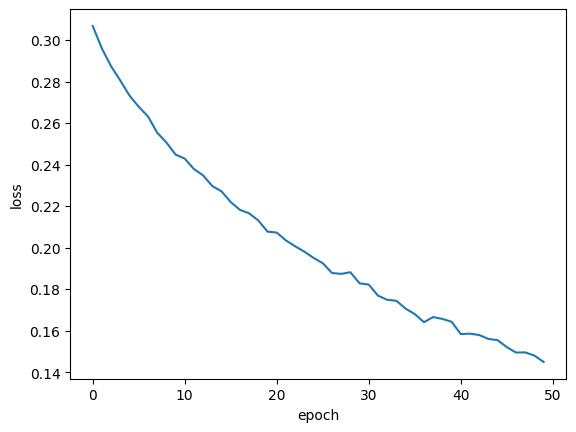

In [26]:
# history loss 의 시각화
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

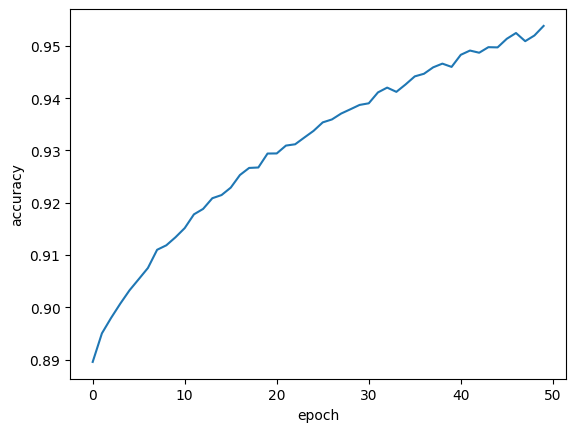

In [27]:
# history accuracy 의 시각화
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

이 model은 새롭게 한게 아니라 기존값을 가지고 있어서 이어서 한거임
강사님한테 사기당한거임 5 + 50 이 되어서 55번이 된거임
새롭게 하려면 model을 새롭게 만들고 해야댐 

In [28]:
# model = model_fn() 으로 다시 가져옴 
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=50, verbose=1) # verbose1값이 default

Epoch 1/50
1500/1500 [==============================] - 1s 664us/step - loss: 0.5328 - accuracy: 0.8125
Epoch 2/50
1500/1500 [==============================] - 1s 626us/step - loss: 0.3961 - accuracy: 0.8587
Epoch 3/50
1500/1500 [==============================] - 1s 648us/step - loss: 0.3567 - accuracy: 0.8730
Epoch 4/50
1500/1500 [==============================] - 1s 620us/step - loss: 0.3335 - accuracy: 0.8802
Epoch 5/50
1500/1500 [==============================] - 1s 618us/step - loss: 0.3167 - accuracy: 0.8854
Epoch 6/50
1500/1500 [==============================] - 1s 636us/step - loss: 0.3036 - accuracy: 0.8929
Epoch 7/50
1500/1500 [==============================] - 1s 612us/step - loss: 0.2947 - accuracy: 0.8960
Epoch 8/50
1500/1500 [==============================] - 1s 631us/step - loss: 0.2850 - accuracy: 0.8989
Epoch 9/50
1500/1500 [==============================] - 1s 642us/step - loss: 0.2785 - accuracy: 0.9005
Epoch 10/50
1500/1500 [==============================] - 1s 665u

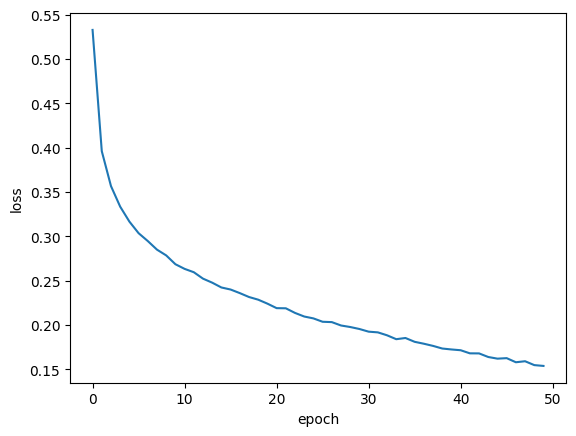

In [29]:
# history loss 의 시각화
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

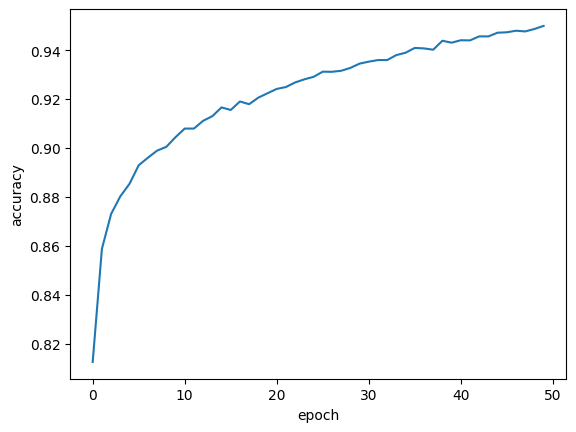

In [30]:
# history accuracy 의 시각화
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

---
### 검증 손실
: 검증세트에 대한 정확도를 파악하기 위해 validation data를 사용한다

In [31]:
# model = model_fn() 으로 다시 가져옴 
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=50, verbose=1, 
                    validation_data = (val_scaled, val_target)
                    ) # verbose1값이 default

Epoch 1/50
1500/1500 [==============================] - 1s 852us/step - loss: 0.5275 - accuracy: 0.8143 - val_loss: 0.4418 - val_accuracy: 0.8428
Epoch 2/50
1500/1500 [==============================] - 1s 753us/step - loss: 0.3901 - accuracy: 0.8590 - val_loss: 0.3668 - val_accuracy: 0.8702
Epoch 3/50
1500/1500 [==============================] - 1s 726us/step - loss: 0.3548 - accuracy: 0.8724 - val_loss: 0.3717 - val_accuracy: 0.8677
Epoch 4/50
1500/1500 [==============================] - 1s 751us/step - loss: 0.3328 - accuracy: 0.8806 - val_loss: 0.3499 - val_accuracy: 0.8796
Epoch 5/50
1500/1500 [==============================] - 1s 730us/step - loss: 0.3180 - accuracy: 0.8869 - val_loss: 0.3588 - val_accuracy: 0.8782
Epoch 6/50
1500/1500 [==============================] - 1s 759us/step - loss: 0.3048 - accuracy: 0.8922 - val_loss: 0.3497 - val_accuracy: 0.8803
Epoch 7/50
1500/1500 [==============================] - 1s 753us/step - loss: 0.2947 - accuracy: 0.8955 - val_loss: 0.3587 -

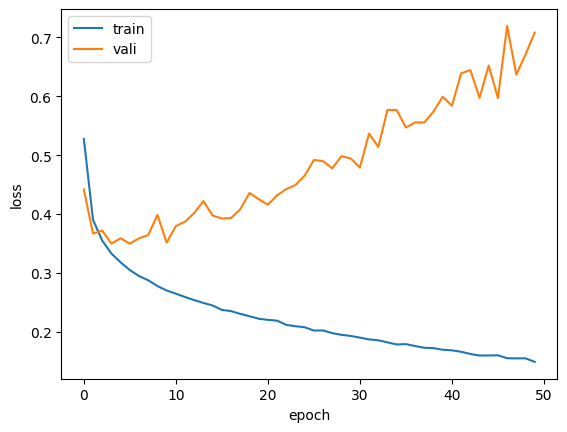

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','vali'])
plt.show()

== >  과 대 적 합 

In [35]:
# optimizer 안썼음 Adam 써서 할꺼임 



model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=50, verbose=1, 
                    validation_data = (val_scaled, val_target)) # verbose1값이 default

Epoch 1/50
1500/1500 [==============================] - 2s 935us/step - loss: 0.5266 - accuracy: 0.8149 - val_loss: 0.4406 - val_accuracy: 0.8411
Epoch 2/50
1500/1500 [==============================] - 1s 849us/step - loss: 0.3973 - accuracy: 0.8578 - val_loss: 0.4191 - val_accuracy: 0.8465
Epoch 3/50
1500/1500 [==============================] - 1s 843us/step - loss: 0.3536 - accuracy: 0.8720 - val_loss: 0.3526 - val_accuracy: 0.8704
Epoch 4/50
1500/1500 [==============================] - 1s 815us/step - loss: 0.3269 - accuracy: 0.8804 - val_loss: 0.3393 - val_accuracy: 0.8787
Epoch 5/50
1500/1500 [==============================] - 1s 882us/step - loss: 0.3084 - accuracy: 0.8866 - val_loss: 0.3521 - val_accuracy: 0.8717
Epoch 6/50
1500/1500 [==============================] - 1s 841us/step - loss: 0.2931 - accuracy: 0.8911 - val_loss: 0.3308 - val_accuracy: 0.8794
Epoch 7/50
1500/1500 [==============================] - 1s 835us/step - loss: 0.2780 - accuracy: 0.8970 - val_loss: 0.3240 -

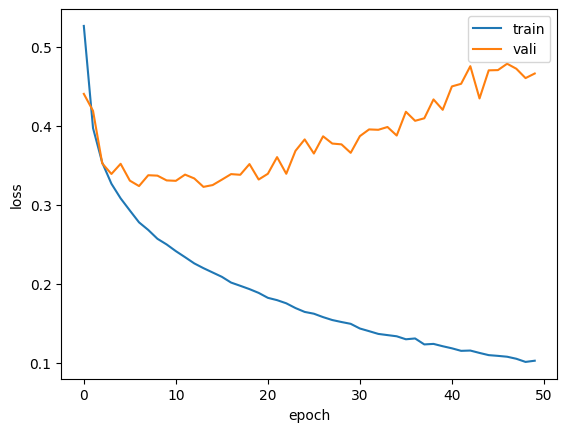

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','vali'])
plt.show()

### optimizer 로도 해결이 안되는구나 다음단계인 규제 를 해야겠고나

In [37]:
# 규제를 하자 dropOUT !!!!!!!

model = model_fn(keras.layers.Dropout(0.3))  # 한 30% 정도 드랍 시켜볼까?
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=50, verbose=1, 
                    validation_data = (val_scaled, val_target)) # verbose1값이 default

Epoch 1/50
1500/1500 [==============================] - 2s 982us/step - loss: 0.5810 - accuracy: 0.7963 - val_loss: 0.4288 - val_accuracy: 0.8434
Epoch 2/50
1500/1500 [==============================] - 1s 863us/step - loss: 0.4348 - accuracy: 0.8431 - val_loss: 0.3871 - val_accuracy: 0.8587
Epoch 3/50
1500/1500 [==============================] - 1s 941us/step - loss: 0.4018 - accuracy: 0.8541 - val_loss: 0.3899 - val_accuracy: 0.8583
Epoch 4/50
1500/1500 [==============================] - 1s 901us/step - loss: 0.3786 - accuracy: 0.8637 - val_loss: 0.3566 - val_accuracy: 0.8682
Epoch 5/50
1500/1500 [==============================] - 1s 979us/step - loss: 0.3651 - accuracy: 0.8673 - val_loss: 0.3478 - val_accuracy: 0.8725
Epoch 6/50
1500/1500 [==============================] - 1s 935us/step - loss: 0.3517 - accuracy: 0.8707 - val_loss: 0.3522 - val_accuracy: 0.8700
Epoch 7/50
1500/1500 [==============================] - 1s 886us/step - loss: 0.3442 - accuracy: 0.8737 - val_loss: 0.3410 -

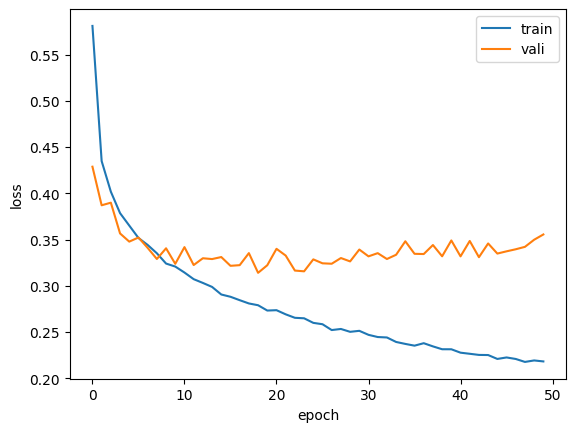

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','vali'])
plt.show()

그래프를 보니 epoch 가 10번만 돌리는게 제일 좋을거 같은데 ? 

In [40]:
# 규제를 하자 dropOUT !!!!!!!

model = model_fn(keras.layers.Dropout(0.3))  # 한 30% 정도 드랍 시켜볼까?
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=1, 
                    validation_data = (val_scaled, val_target)) # verbose1값이 default

Epoch 1/10
1500/1500 [==============================] - 2s 953us/step - loss: 0.5953 - accuracy: 0.7909 - val_loss: 0.4245 - val_accuracy: 0.8482
Epoch 2/10
1500/1500 [==============================] - 1s 976us/step - loss: 0.4382 - accuracy: 0.8412 - val_loss: 0.3872 - val_accuracy: 0.8599
Epoch 3/10
1500/1500 [==============================] - 1s 980us/step - loss: 0.4039 - accuracy: 0.8537 - val_loss: 0.3789 - val_accuracy: 0.8597
Epoch 4/10
1500/1500 [==============================] - 1s 876us/step - loss: 0.3842 - accuracy: 0.8597 - val_loss: 0.3572 - val_accuracy: 0.8687
Epoch 5/10
1500/1500 [==============================] - 1s 846us/step - loss: 0.3649 - accuracy: 0.8652 - val_loss: 0.3375 - val_accuracy: 0.8758
Epoch 6/10
1500/1500 [==============================] - 1s 870us/step - loss: 0.3542 - accuracy: 0.8703 - val_loss: 0.3531 - val_accuracy: 0.8696
Epoch 7/10
1500/1500 [==============================] - 1s 844us/step - loss: 0.3456 - accuracy: 0.8733 - val_loss: 0.3311 -

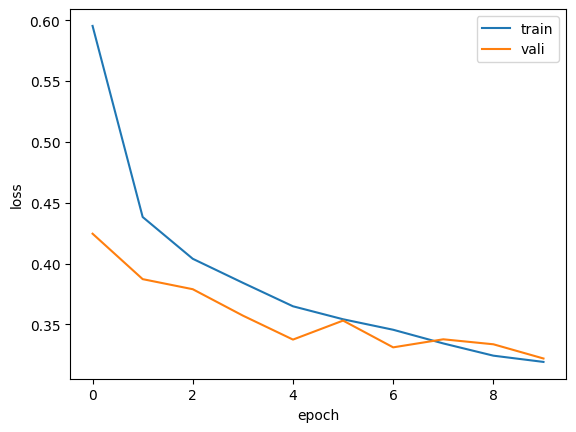

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','vali'])
plt.show()

---
### 모델의 저장과 복원
- hdf5 format

In [42]:
# model의 전체를 저장
model.save("../Data/model_whole.h5")

In [43]:
# 복원

model = keras.models.load_model('../Data/model_whole.h5')

In [44]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 435us/step - loss: 0.3220 - accuracy: 0.8841


[0.3219664394855499, 0.8840833306312561]

---
### Callbacks
- 훈련수행시 손실값이 제일 작은 함수를 저장. (지가 알아서 이게 제일 좋은거 같은걸로 알아서 저장해준다고 함) <- 굉장히 편함

In [45]:
model = model_fn(keras.layers.Dropout(0.3)) 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5")
history = model.fit(train_scaled, train_target, epochs=70, verbose=1, 
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb]
                    )

Epoch 1/70
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6038 - accuracy: 0.7886 - val_loss: 0.4336 - val_accuracy: 0.8453
Epoch 2/70
1500/1500 [==============================] - 1s 956us/step - loss: 0.4480 - accuracy: 0.8394 - val_loss: 0.4041 - val_accuracy: 0.8494
Epoch 3/70
1500/1500 [==============================] - 1s 885us/step - loss: 0.4093 - accuracy: 0.8506 - val_loss: 0.3704 - val_accuracy: 0.8622
Epoch 4/70
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3854 - accuracy: 0.8595 - val_loss: 0.3604 - val_accuracy: 0.8695
Epoch 5/70
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3739 - accuracy: 0.8634 - val_loss: 0.3517 - val_accuracy: 0.8701
Epoch 6/70
1500/1500 [==============================] - 1s 881us/step - loss: 0.3603 - accuracy: 0.8671 - val_loss: 0.3466 - val_accuracy: 0.8721
Epoch 7/70
1500/1500 [==============================] - 1s 894us/step - loss: 0.3479 - accuracy: 0.8717 - val_loss: 0.3397 - val_a

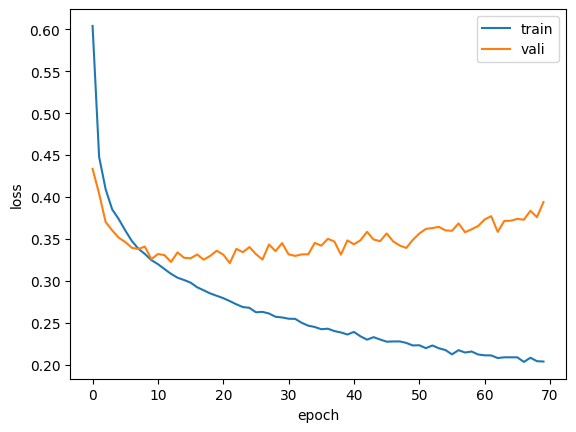

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','vali'])
plt.show()

In [47]:
# best model 복원

model = keras.models.load_model('../Data/best-model.h5')

In [48]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 456us/step - loss: 0.3941 - accuracy: 0.8873


[0.3940991759300232, 0.887333333492279]

### Early Stopping(조기종료)


In [50]:
model = model_fn(keras.layers.Dropout(0.3)) 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # 보통은 patience 2번정도는 참아줌 
history = model.fit(train_scaled, train_target, epochs=70, verbose=1, 
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb]
                    )

Epoch 1/70
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5948 - accuracy: 0.7909 - val_loss: 0.4334 - val_accuracy: 0.8452
Epoch 2/70
1500/1500 [==============================] - 1s 857us/step - loss: 0.4425 - accuracy: 0.8402 - val_loss: 0.3895 - val_accuracy: 0.8600
Epoch 3/70
1500/1500 [==============================] - 1s 849us/step - loss: 0.4058 - accuracy: 0.8522 - val_loss: 0.3641 - val_accuracy: 0.8664
Epoch 4/70
1500/1500 [==============================] - 1s 877us/step - loss: 0.3833 - accuracy: 0.8601 - val_loss: 0.3651 - val_accuracy: 0.8656
Epoch 5/70
1500/1500 [==============================] - 1s 846us/step - loss: 0.3690 - accuracy: 0.8640 - val_loss: 0.3464 - val_accuracy: 0.8739
Epoch 6/70
1500/1500 [==============================] - 1s 907us/step - loss: 0.3549 - accuracy: 0.8699 - val_loss: 0.3356 - val_accuracy: 0.8767
Epoch 7/70
1500/1500 [==============================] - 1s 851us/step - loss: 0.3457 - accuracy: 0.8722 - val_loss: 0.3515 - v

In [52]:
# 몇번째 epoch에서 stop 되었는가?
early_stopping_cb.stopped_epoch

11

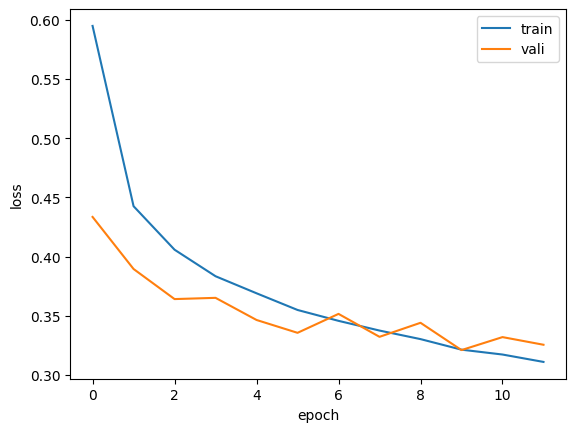

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','vali'])
plt.show()